# Symptom-behaviour analyses - Replication sample

## Analysis overview

#### Discovery sample

1. Model fitting: [`Model fitting - Discovery.ipynb`](<../../notebooks/discovery/Model fitting - Discovery.ipynb>)
2. Confidence analysis: [`Confidence analysis - Discovery.ipynb`](<../../notebooks/discovery/Confidence analysis - Discovery.ipynb>)
3. Transdiagnostic factor estimation: [`Transdiagnostic factors - Discovery.ipynb`](<../../notebooks/discovery/Transdiagnostic factors - Discovery.ipynb>)
4. Symptom-behaviour analyses: [`Symptom analyses - Discovery.ipynb`](<../../notebooks/discovery/Symptom analyses - Discovery.ipynb>)

#### Replication sample

1. Model fitting: [`Model fitting - Replication.ipynb`](<../../notebooks/replication/Model fitting - Replication.ipynb>)
2. Confidence analysis: [`Confidence analysis - Replication.ipynb`](<../../notebooks/replication/Confidence analysis - Replication.ipynb>)
3. Two-step task analysis: [`Two-step modelling - Replication.ipynb`](<../../notebooks/replication/Two-step modelling - Replication.ipynb>)
4. Transdiagnostic factor estimation: [`Transdiagnostic factors - Replication.ipynb`](<../../notebooks/replication/Transdiagnostic factors - Replication.ipynb>)
5. **⭐ Symptom-behaviour analyses: [`Symptom analyses - Replication.ipynb`](<../../notebooks/replication/Symptom analyses - Replication.ipynb>)** ⭐

#### Test-retest sample

1. Model-fitting: [`Model fitting - Retest.ipynb`](<../../notebooks/retest/Model fitting - Retest.ipynb>)
2. Two-step modelling: [`Two-step modelling - Retest.ipynb`](<../../notebooks/retest/Two-step modelling - Retest.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Retest.ipynb`](<../../notebooks/retest/Test-retest - Retest.ipynb>)

#### Follow-up sample

1. Model fitting: [`Model fitting - Follow up.ipynb`](<../../notebooks/follow-up/Model fitting - Follow up.ipynb>)
2. Transdiagnostic factor estimation: [`Transdiagnostic factors - Follow up.ipynb`](<../../notebooks/follow-up/Transdiagnostic factors - Follow up.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Follow up.ipynb`](<../../notebooks/follow-up/Test-retest - Follow up.ipynb>)
4. Longitudinal analyses: [`Longitudinal analyses - Follow up.ipynb`](<../../notebooks/follow-up/Longitudinal analyses - Follow up.ipynb>)

#### Follow-up sample (1 year)

1. Model fitting: [`Model fitting - Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Model fitting - Follow up 1yr.ipynb>)
2. Transdiagnostic factor estimation: [`Transdiagnostic factors - Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Transdiagnostic factors - Follow up 1yr.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Test-retest - Follow up 1yr.ipynb>)
4. Longitudinal analyses: [`Longitudinal analyses -  Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Longitudinal analyses - Follow up 1yr.ipynb>)

## Notebook overview

This notebook tests for relationships between our behavioural metrics and transdiagnostic symptom dimensions. We also test for relationships between behaviour and state measures of anxiety and depression.


## Imports

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import cond
from pingouin import mediation_analysis
from stats_utils.mediation.utils import mediation_analysis_to_markdown_table
from stats_utils.regression.utils import (
    ols_to_markdown_table,
    run_regression_and_plot,
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

from transition_uncertainty.analysis_utils import (
    calculate_performance,
    compile_ols_results,
)
from transition_uncertainty.data import load_and_process_data
from transition_uncertainty.style import set_style
from transition_uncertainty.utils import (
    caption_and_save_markdown_tables,
    check_directories,
)

# Raise an error if we're not in the root directory by checking if the data folder exists
check_directories()

set_style("style.mplstyle")

# Create necessary diredtory if it does not exist
if not os.path.exists("results/replication/symptom_models"):
    os.makedirs("results/replication/symptom_models")

# Dictionary for renaming variables
variable_rename_dict = {
    "Compul": "CIT",
    "GAD_7": "GAD 7",
    "PHQ_8": "PHQ 8",
    "gender": "Gender",
    "age": "Age",
    "motivation": "Motivation",
    "bet_correct": "Accuracy",
}

/users/user/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Font Heebo already available in Matplotlib.
Matplotlib style set to: style.mplstyle with font Heebo


## Load in data

### 1. Data Loading
The code initially loads multiple datasets related to:
- **Questionnaire Data:** Participant responses from various questionnaires.
- **Transdiagnostic Factor Scores:** Predicted factor scores on three transdiagnostic dimensions: Anxiety + Depression (AD), Compulsivity & Intriusive Thought (Compul), and Social Withdrawal (SW)
- **Model Parameters:** Parameters estimated from computational modelling of behaviour on the task.
- **Confidence Parameters:** Parameters specifically derived from modelling of confidence reports in the task.

Each dataset is loaded from its respective CSV file using Pandas' `read_csv` function.

### 2. Data Merging
After loading, the datasets are merged sequentially into a single DataFrame named `qdata`. Merging is based on the "subjectID", ensuring all information corresponding to a participant is collated into single rows within the merged DataFrame.

### 3. Data Filtering
Subsequent steps involve filtering the data to exclude particular categories and subjects based on specific conditions:
- Subjects identifying with gender category "3" ('Other') are excluded due to their small sample size, which may not provide robust estimates in subsequent analyses.
- Subjects who failed attention checks are excluded.
- Subjects who incorrectly answered more than one "infrequency item check" are excluded.

### 4. Data Scaling
Post-filtering, variables (excluding 'subjectID' and 'gender') are scaled (standardized) by subtracting their respective means and dividing by their standard deviations. 



In [2]:
qdata = load_and_process_data("replication", scale=True)

Initial number of subjects: 1400
Number of included subjects after excluding gender != 0 or 1: 1391
Number of included subjects after excluding age < 18 or >= 100: 1391
Number of included subjects after excluding attention check failures: 1322
Mean (SD) age = 41.15 (12.69)
n male = 655; n female = 667
Number scoring above cutoff for GAD: 243 (18.38%)
Number scoring above cutoff for MDD: 312 (23.6%)
Number of subjects after filtering and processing: 1322


/scratch/users/user/transition_uncertainty/transition_uncertainty/analysis_utils.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  confidence_df.loc[confidence_df["pinkBet"] != 0, "bet_colour"] = "pink"


## Run analyses

### Correlation between indices of model-basedness

In [3]:
from scipy.stats import spearmanr

rho, p = spearmanr(qdata["MB_MF_WAIC_diff"], qdata["two_step_parameter"])

# Print rounded correlation coefficient and p-value.
print(f"rho = {rho:.2f}, p = {p:.3f}")

rho = 0.17, p = 0.000


### Associations with transdiagnostic factors

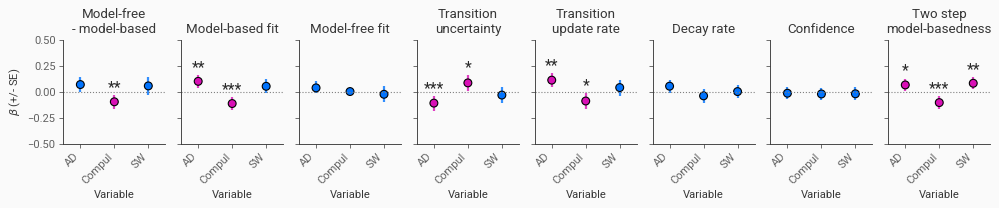

In [4]:
# Create transdiagnostic subdirectory if it does not exist
if not os.path.exists("results/replication/symptom_models/transdiagnostic"):
    os.makedirs("results/replication/symptom_models/transdiagnostic")

# Parameters for the models and plots
variables = [
    "MB_MF_WAIC_diff",
    "MB_WAIC",
    "MF_WAIC",
    "transition_var",
    "tau_prob",
    "decay_prob",
    "adjusted_confidence",
    "two_step_parameter"
]
titles = [
    "Model-free\n- model-based",
    "Model-based fit",
    "Model-free fit",
    "Transition\nuncertainty",
    "Transition\nupdate rate",
    "Decay rate",
    "Confidence",
    "Two step\nmodel-basedness"
]

# Add variables and titles to the variable rename dict
variable_rename_dict.update(dict(zip(variables, titles)))

# Create subplots
f, ax = plt.subplots(1, 8, figsize=(12.5, 2.7), sharey=True)

# Common regression formula
formula = "AD + Compul + SW + gender + age + motivation"

# Create an empty list to store model objects
transdiagnostic_models = []

# Create an empty list to store markdown tables
transdiagnostic_markdown_tables = {}

# Number of variables we're correcting for multiple comparisons across This is
# our three main dependent variables (uncertainty, update rate,
# model-basedness) We look at the others here as well, but they are not the
# main focus, and we do not correct for multiple comparisons.
n_variables = 3

# Loop through the variables and corresponding titles, running regression and
# plotting for each
for i, (var, title) in enumerate(zip(variables, titles)):
    # If dependent var is confidence, add performance metrics to formula
    if var == "adjusted_confidence":
        model_formula = formula + " + bet_correct"
    else:
        model_formula = formula

    # Get the number of variables we're correcting across This should be 3 (as
    # specified above) if we're looking at one of our Preregistered dependent
    # variables, as the others don't really matter for these analyses
    n_variables_model = (
        n_variables
        if var in ["transition_var", "tau_prob", "MB_MF_WAIC_diff"]
        else 1
    )

    model, _ = run_regression_and_plot(
        qdata,
        var,
        model_formula,
        20000,
        save_fig=False,
        show_summary=False,
        ax=ax[i],
        forest_plot_kwargs={
            "exclude_param_names": [
                "age",
                "gender",
                "motivation",
                "bet_correct",
            ],
            "significance_thresholds": {
                0.001 / n_variables_model: "***",
                0.01 / n_variables_model: "**",
                0.05 / n_variables_model: "*",
            },
            "alpha": 0.05 / n_variables_model,
        },
    )

    transdiagnostic_models.append(model)  # Store the model object

    # Store the table in markdown form
    transdiagnostic_markdown_tables[title] = ols_to_markdown_table(
        model,
        alpha_corr=0.05 / n_variables_model if n_variables_model > 1 else None,
        predictor_rename_dict=variable_rename_dict,
    )

    # Set title for each subplot
    ax[i].set_title(title)

# Adjust y-axis limits.
ax[0].set_ylim(-0.5, 0.5)

# Remove y label from plots 1-4
for i in range(1, 8):
    ax[i].set_ylabel("")

# Tighten layout
plt.tight_layout()

# Combine results into a dataframe
transdiagnostic_results = compile_ols_results(transdiagnostic_models)

# Save the results to a csv file
transdiagnostic_results.to_csv(
    "results/replication/symptom_models/transdiagnostic_results.csv", index=False
)

### Check multicollinearity

In [5]:
# This will be the same for all models as the design matrix is the same.
# Get the design matrix without the intercept.
X = transdiagnostic_models[0].model.data.orig_exog
X = X.drop("Intercept", axis=1)

# Get the VIFs
vifs = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
)

# Print the VIFs
# Should be < 10 (or 5 ideally)
print(vifs)

# Condition number
# Should be < 30
condition_number = cond(X.values)
print("Condition number: ", condition_number)

AD            1.449348
Compul        1.473281
SW            1.411690
gender        1.013021
age           1.140803
motivation    1.045623
dtype: float64
Condition number:  2.09319017750354


### Associations with state anxiety/depression symptoms

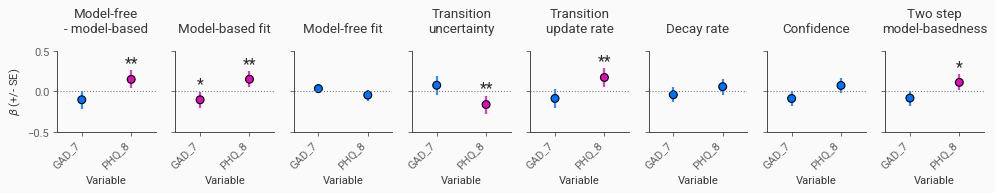

In [6]:
# Create transdiagnostic subdirectory if it does not exist
if not os.path.exists("results/replication/symptom_models/dep_anx"):
    os.makedirs("results/replication/symptom_models/dep_anx")

# Create subplots
f, ax = plt.subplots(1, 8, figsize=(12.5, 2.7), sharey=True)

# Common regression formula
formula = "GAD_7 + PHQ_8 + gender + age + motivation"

# Create an empty list to store model objects
anx_dep_models = []

# Create an empty list to store markdown tables
anx_dep_markdown_tables = {}

# Loop through the variables and corresponding titles, running regression and
# plotting for each
for i, (var, title) in enumerate(zip(variables, titles)):
    # If dependent var is confidence, add performance metrics to formula
    if var == "average_confidence":
        model_formula = formula + " + bet_correct"
    else:
        model_formula = formula

    # Get the number of variables we're correcting across This should be 3 (as
    # specified above) if we're looking at one of our Preregistered dependent
    # variables, as the others don't really matter for these analyses
    n_variables_model = (
        n_variables
        if var in ["transition_var", "tau_prob", "MB_MF_WAIC_diff"]
        else 1
    )

    model, _ = run_regression_and_plot(
        qdata,
        var,
        model_formula,
        20000,
        save_fig=False,
        show_summary=False,
        ax=ax[i],
        forest_plot_kwargs={
            "exclude_param_names": [
                "age",
                "gender",
                "motivation",
                "bet_correct",
            ],
            "significance_thresholds": {
                0.001 / n_variables_model: "***",
                0.01 / n_variables_model: "**",
                0.05 / n_variables_model: "*",
            },
            "alpha": 0.05 / n_variables_model,
        },
    )

    anx_dep_models.append(model)  # Store the model object

    # Store the table in markdown form
    anx_dep_markdown_tables[title] = ols_to_markdown_table(
        model, alpha_corr=0.05 / 3, predictor_rename_dict=variable_rename_dict
    )

    # Set title for each subplot
    ax[i].set_title(title, y=1.15)

# Adjust y-axis limits.
ax[0].set_ylim(-0.5, 0.5)

# Remove y label from plots 1-4
for i in range(1, 8):
    ax[i].set_ylabel("")

# Tighten layout
plt.tight_layout()

# Combine results into a dataframe
anx_dep_results = compile_ols_results(anx_dep_models)

# Save the results to a csv file
anx_dep_results.to_csv(
    "results/replication/symptom_models/anx_dep_results.csv", index=False
)

## Mediation analysis

### Transdiagnostic factors

Here we use mediation analyses to test the hypothesis that the Compulsivity/Intrusive thought -> Transition variance relationship is mediated by the $\tau_p$ (update rate) and $\lambda_p$ (decay rate) parameters.

In [7]:
# Set up covariates
covar = ["AD", "SW", "age", "gender", "motivation"]

# Run the model
mediation_analysis(
    data=qdata,
    x="Compul",
    m=["tau_prob", "decay_prob"],
    y="transition_var",
    covar=covar,
    alpha=0.05,
    seed=42,
    n_boot=20000,
)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,tau_prob ~ X,-0.090400,0.031767,4.500172e-03,-0.152721,-0.028080,Yes
1,decay_prob ~ X,-0.040757,0.033250,2.204959e-01,-0.105986,0.024471,No
2,Y ~ tau_prob,-0.819155,0.007934,0.000000e+00,-0.834719,-0.803590,Yes
3,Y ~ decay_prob,-0.361695,0.007599,3.184088e-288,-0.376603,-0.346787,Yes
4,Total,0.084011,0.031650,8.041224e-03,0.021921,0.146100,Yes
5,Direct,-0.004815,0.009086,5.962600e-01,-0.022639,0.013009,No
6,Indirect tau_prob,0.074080,0.025702,4.300000e-03,0.023610,0.124689,Yes
7,Indirect decay_prob,0.014745,0.012039,2.198000e-01,-0.008989,0.038215,No


This indicates that the link between CIT and transition variance is fully mediated by the update and decay rates of the model. The total effect (X -> Y) is significant, but the direct effect (X -> Y) is not significant when controlling for the mediator (M). The indirect effects (X -> M -> Y) are significant.

Next, we test the hypothesis that the Compulsivity/Intrusive thought -> Model-basedness relationship is mediated by uncertainty about learnt state transitions.

In [8]:
# Set up covariates
covar = ["AD", "SW", "age", "gender", "motivation"]

# Run the model
transdiagnostic_mediation_model = mediation_analysis(
    data=qdata,
    x="Compul",
    m=["transition_var"],
    y="MB_MF_WAIC_diff",
    covar=covar,
    alpha=0.05,
    seed=42,
    n_boot=20000,
)

# Create a markdown table
transdiagnostic_mediation_table = mediation_analysis_to_markdown_table(
    transdiagnostic_mediation_model, variable_rename_dict=variable_rename_dict
)

Again, this indicates that the relationship is fully mediated by uncertainty about state transitions.

### State anxiety (GAD-7)

We now do the same for state anxiety, as measured by the GAD-7 questionnaire.


In [9]:
# Set up covariates
covar = ["PHQ_8", "AD", "age", "gender", "motivation"]

# Run the model
anx_mediation_model = mediation_analysis(
    data=qdata,
    x="GAD_7",
    m=["tau_prob"],
    y="transition_var",
    covar=covar,
    alpha=0.05,
    seed=42,
    n_boot=20000,
)

# Create a markdown table
anx_mediation_table = mediation_analysis_to_markdown_table(
    anx_mediation_model, variable_rename_dict=variable_rename_dict
)

### State depression (PHQ-8)

And finally, we do the same for state depression, as measured by the PHQ-8 questionnaire.

In [10]:
# Set up covariates
covar = ["GAD_7", "AD", "age", "gender", "motivation"]

# Run the model
dep_mediation_model = mediation_analysis(
    data=qdata,
    x="PHQ_8",
    m=["tau_prob"],
    y="transition_var",
    covar=covar,
    alpha=0.05,
    seed=42,
    n_boot=20000,
)

# Create a markdown table
dep_mediation_table = mediation_analysis_to_markdown_table(
    dep_mediation_model, variable_rename_dict=variable_rename_dict
)

## Save markdown tables

We save the tables as markdown files for easy inclusion in the manuscript.

In [11]:
all_tables = {
    "transdiagnostic": transdiagnostic_markdown_tables,
    "transdiagnostic_mediation": {
        "compulsivity and intrusive thought;transition uncertainty;"
        "model-basedness": transdiagnostic_mediation_table
    },
    "anx_dep": anx_dep_markdown_tables,
    "anx_mediation": {
        "anxiety;transition uncertainty;model-basedness": transdiagnostic_mediation_table,
        "depression;transition uncertainty;model-basedness": transdiagnostic_mediation_table,
    },
}

caption_and_save_markdown_tables(
    all_tables, "replication", "paper/supplementary_tables.md", append=True
)

Appending to existing file: paper/supplementary_tables.md
Conversion to PDF completed successfully.
Conversion to docx completed successfully.
